# Image preprocessing

<b>In this notebook I'm preprocessing images.</b>
<p>It takes:</p>
<ul>
<li>Crop images from a <b>train set</b> to optimal size</li>
<li>Image labeling</li>
<li>Transfom to dataset</li>
<li>Crop images from a <b>test set</b></li>
<li>Save all data to a <b>pickle</b> to use it in another notebooks</li>
</ul>

In [2]:
import os
import pickle
import numpy as np
import random as rnd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# CONSTANTS
# your own path instead of '...'

RAW_TRAIN_PATH = '...\\IDRND_FASDB_train\\'
RAW_TEST_PATH = '...\test\\'

PROCESSED_PATH = '...\\resized\\' 
PROCESSED_TRAIN_PATH = PROCESSED_PATH + 'train\\'
PROCESSED_TEST_PATH = PROCESSED_PATH + 'test\\'

PICKLE_DATA_PATH = '...'

In [4]:
# get image by its path

def get_image(path):
    img = plt.imread(path)
    return img

In [3]:
# resize images

def imgs_resize(imgs, new_size, img_path, new_path):
    for im in imgs:
        img = Image.open(img_path + im)
        img = img.resize((int(new_size), int(new_size)), Image.ANTIALIAS)
        img.save(new_path + im[:-4] + '__res.png')

In [5]:
# returns set of random images of some path

def get_rnd_files(files, num, iterations):
    for i in range(iterations):
        rnd.shuffle(files)
    
    return files[:num]

In [6]:
# walk all the raw train files

files = []
for file in os.walk(RAW_TRAIN_PATH):
    files.append(file)

In [7]:
# get all heights and widths of images
# Printing max and min heights and widths

heights = []
widths = []

for img in files[1][2]:
    heights.append(get_image(RAW_TRAIN_PATH + 'real\\' + str(img)).shape[0])
    widths.append(get_image(RAW_TRAIN_PATH + 'real\\' + str(img)).shape[1])

print("Max height: " + str(max(heights)))
print("Max width: " + str(max(widths)))
print("Min height: " + str(min(heights)))
print("Min width: " + str(min(widths)))

Max height: 1677
Max width: 1677
Min height: 186
Min width: 186


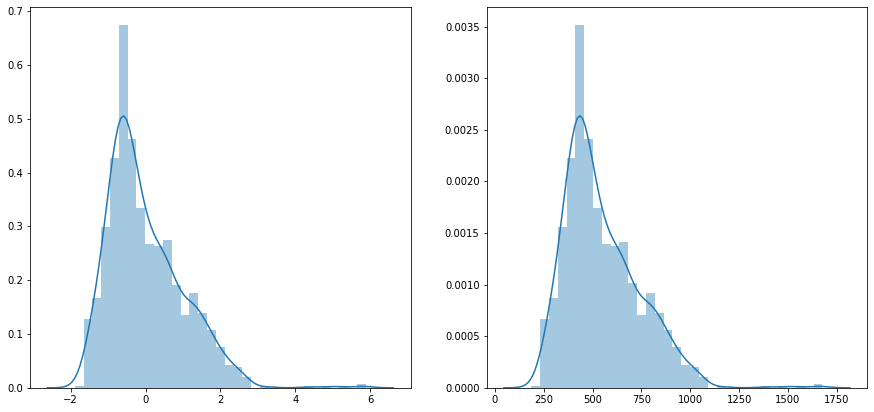

In [23]:
# Plotting distributions of heights and widths

_, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(heights, ax=ax[0])
sns.distplot(widths, ax=ax[1])

In [6]:
#resizing images and saving them in new directory

imgs_resize(files[1][2], 128, RAW_TRAIN_PATH + 'real\\',
            PROCESSED_TRAIN_PATH + 'real\\')
imgs_resize(files[2][2], 128, RAW_TRAIN_PATH + 'spoof\\',
            PROCESSED_TRAIN_PATH + 'spoof\\')

In [24]:
resized_img = []

for file in os.walk(PROCESSED_PATH):
    resized_img.append(file)

In [38]:
spoof_copy = resized_img[2][2]

In [40]:
spoof_imgs = get_rnd_files(spoof_copy, len(resized_img[1][2]), iterations=5)

In [89]:
# image labeling

train_imgs = []

for img in resized_img[1][2]:
    train_imgs.append([get_image(resized_img[1][0] + '\\' + img), 0])
    
for img in spoof_imgs:
    train_imgs.append([get_image(resized_img[2][0] + '\\' + img), 1])

IndexError: list index out of range

In [64]:
# shuffle dataset

rnd.shuffle(train_imgs)

In [68]:
# popping labels from dataset into separate array
# and save 'em all in binary format

X = []
y = []

for feature, label in train_imgs:
    X.append(feature)
    y.append(label)
    
out = open(PICKLE_DATA + 'X.pickle', 'wb')
pickle.dump(X, out)
out.close()

out = open(PICKLE_DATA + 'y.pickle', 'wb')
pickle.dump(y, out)
out.close()

del X, y

MemoryError: 

All the same with test set below

In [6]:
files = []
for file in os.walk(RAW_TEST_PATH):
    files.append(file)

In [78]:
imgs_resize(files[0][2], 128, files[0][0], PROCESSED_TEST_PATH)

In [7]:
resized_img = []

for file in os.walk(PROCESSED_TEST_PATH):
    resized_img.append(file)

In [10]:
train_imgs1 = []
train_imgs2 = []

for img in resized_img[0][2][0:5000]:
    train_imgs1.append(get_image(resized_img[0][0] + img))


out = open(PICKLE_PATH + 'test1.pickle', 'wb')
pickle.dump(train_imgs1, out)
out.close()

del train_imgs1
    
for img in resized_img[0][2][5000:10001]:
    train_imgs2.append(get_image(resized_img[0][0] + img))
    
out = open(PICKLE_PATH + 'test2.pickle', 'wb')
pickle.dump(train_imgs2, out)
out.close()

del train_imgs2